In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("~/Downloads/data2.csv")
df.rnd = df.apply(axis=1, func = lambda x: x.n / 2)
df.shape

(14919, 7)

In [3]:
df.head(10)

,n,subtree_cnt,depth,height,loexpect,hiexpect,rnd
0,9,2,4,1,3.767442,5.232558,4.5
1,9,1,5,0,4.302326,4.697674,4.5
2,9,6,1,4,7.395349,1.604651,4.5
3,9,4,2,3,2.534884,6.465116,4.5
4,9,1,2,0,2.534884,6.465116,4.5
5,9,3,3,2,3.883721,5.116279,4.5
6,9,1,1,0,5.790698,3.209302,4.5
7,9,1,1,0,5.790698,3.209302,4.5
8,14,6,1,2,11.251642,2.748358,7.0
9,14,3,2,1,4.313477,9.686523,7.0


In [4]:
#df['subtree_cnt'] = df.apply(axis=1, func = lambda x: x.subtree_cnt / x.n)
#df['depth'] = df.apply(axis=1, func = lambda x: x.depth / np.log(x.n))
#df['height'] = df.apply(axis=1, func = lambda x: x.height / np.log(x.n))

#df.head(10)

In [5]:
df['alt'] = df.apply(axis=1,
    func = lambda x: x.hiexpect if x.depth % 2 else x.loexpect)
#df['alt'] = df.apply(axis=1, func = lambda x: x.alt / (x.n-1))
#df['rnd'] = df.apply(axis=1, func = lambda x: x.rnd / (x.n-1))
df.head(15)

,n,subtree_cnt,depth,height,loexpect,hiexpect,rnd,alt
0,9,2,4,1,3.767442,5.232558,4.5,3.767442
1,9,1,5,0,4.302326,4.697674,4.5,4.697674
2,9,6,1,4,7.395349,1.604651,4.5,1.604651
3,9,4,2,3,2.534884,6.465116,4.5,2.534884
4,9,1,2,0,2.534884,6.465116,4.5,2.534884
5,9,3,3,2,3.883721,5.116279,4.5,5.116279
6,9,1,1,0,5.790698,3.209302,4.5,3.209302
7,9,1,1,0,5.790698,3.209302,4.5,3.209302
8,14,6,1,2,11.251642,2.748358,7.0,2.748358
9,14,3,2,1,4.313477,9.686523,7.0,4.313477


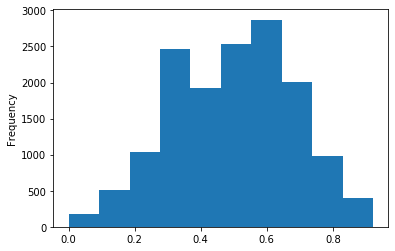

In [6]:
relerr = df.apply(axis=1, func = lambda x: np.abs(x.rnd-x.alt)/x.rnd)
df['err'] = np.power(relerr, 0.5);
df.err.plot(kind="hist");

In [7]:
bv = relerr > 0.1
df[bv].head(10)

,n,subtree_cnt,depth,height,loexpect,hiexpect,rnd,alt,err
0,9,2,4,1,3.767442,5.232558,4.5,3.767442,0.403473
2,9,6,1,4,7.395349,1.604651,4.5,1.604651,0.802129
3,9,4,2,3,2.534884,6.465116,4.5,2.534884,0.660827
4,9,1,2,0,2.534884,6.465116,4.5,2.534884,0.660827
5,9,3,3,2,3.883721,5.116279,4.5,5.116279,0.370069
6,9,1,1,0,5.790698,3.209302,4.5,3.209302,0.535557
7,9,1,1,0,5.790698,3.209302,4.5,3.209302,0.535557
8,14,6,1,2,11.251642,2.748358,7.0,2.748358,0.779344
9,14,3,2,1,4.313477,9.686523,7.0,4.313477,0.619507
10,14,2,1,1,9.759516,4.240484,7.0,4.240484,0.627867


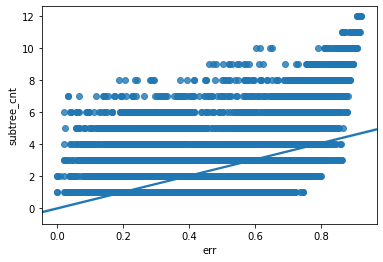

In [8]:
sns.regplot (x="err", y="subtree_cnt", data=df);

In [9]:
df['isleaf'] = df.apply(axis=1, func = lambda x: x.height == 0)
df.head(5)

,n,subtree_cnt,depth,height,loexpect,hiexpect,rnd,alt,err,isleaf
0,9,2,4,1,3.767442,5.232558,4.5,3.767442,0.403473,False
1,9,1,5,0,4.302326,4.697674,4.5,4.697674,0.209589,True
2,9,6,1,4,7.395349,1.604651,4.5,1.604651,0.802129,False
3,9,4,2,3,2.534884,6.465116,4.5,2.534884,0.660827,False
4,9,1,2,0,2.534884,6.465116,4.5,2.534884,0.660827,True


In [10]:
bins = 6;
base = 1.2;
ranges=[]

denom = (np.power(base, bins) - 1) / (base - 1);
for i in range(0, bins):
    ranges.append(np.power(base, i)/denom)
ranges.reverse() 
for i in range(1, bins):
    ranges[i] += ranges[i-1]
ranges[-1] = 1.1

def findBin(x):
    for i in range(0, bins):
        if x < ranges[i]:
            return i

y = df.err.apply(findBin)
#df.err.apply(findBin).value_counts().plot(kind="bar");
#df[y == 3].err.plot(kind="hist");

print(ranges)
#print(findBin(0.4))

[0.25058812155586346, 0.4594115561857497, 0.6334310850439882, 0.7784473590925203, 0.8992942541329637, 1.1]


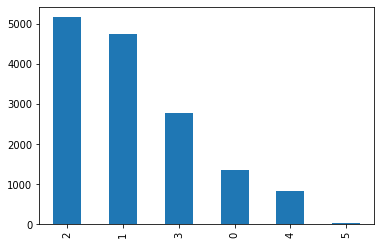

In [11]:
y.value_counts().plot(kind="bar");

In [12]:
X = pd.DataFrame([df.subtree_cnt, df.depth, df.height, df.isleaf]).transpose()
X.head(5)

,subtree_cnt,depth,height,isleaf
0,2,4,1,0
1,1,5,0,1
2,6,1,4,0
3,4,2,3,0
4,1,2,0,1


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=525)
model = RandomForestClassifier().fit(X_train, y_train)

print("train score:", model.score(X_train, y_train))
print("test score:", model.score(X_test, y_test))

train score: 0.7351863437304496
test score: 0.7351206434316354


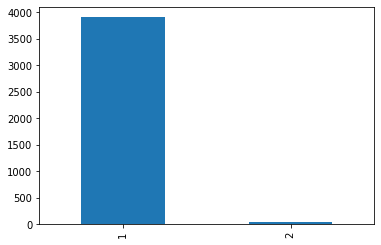

In [20]:
predictError = np.abs(model.predict(X)-y)
predictError[predictError != 0].value_counts().plot(kind="bar");

In [24]:
X_anal = pd.DataFrame([model.predict(X), y]).transpose()
X_anal = X_anal.rename(columns={0: 'predict', 1: 'expected'})
X_anal = pd.concat([df, X_anal], axis=1)
#X_anal.head(20)
X_anal[X_anal.expected == 5].head(15)

,n,subtree_cnt,depth,height,loexpect,hiexpect,rnd,alt,err,isleaf,predict,expected
176,14,11,1,7,12.827004,1.172996,7.0,1.172996,0.912376,False,4,5
264,14,11,1,9,12.869565,1.130435,7.0,1.130435,0.915702,False,4,5
681,15,12,1,6,13.709499,1.290501,7.5,1.290501,0.909908,False,5,5
682,15,11,2,5,1.259033,13.740967,7.5,1.259033,0.912211,False,5,5
767,15,12,1,6,13.747949,1.252051,7.5,1.252051,0.912721,False,5,5
1451,15,12,1,7,13.738550,1.261450,7.5,1.261450,0.912034,False,5,5
1457,15,11,2,6,1.227099,13.772901,7.5,1.227099,0.914542,False,5,5
1500,15,12,1,7,13.760364,1.239636,7.5,1.239636,0.913627,False,5,5
2344,14,11,1,8,12.846154,1.153846,7.0,1.153846,0.913874,False,5,5
2633,13,10,2,9,1.123810,11.876190,6.5,1.123810,0.909454,False,5,5
